In [18]:
import pandas as pd
import plotly.express as exp
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set()

pd.options.display.float_format ='{:,.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows= None

In [19]:
# Wrangle Function

def wrangle (filename, encoding = None, dropna_columnnames = None, change_column_name= None, date_column= None, remove_duplicated_rows_columnsname = None):
    # Loading Data from csv file
    df = pd.read_csv(filename, encoding= encoding)

    ### Get Orders NaN Rows
    df.dropna(subset= dropna_columnnames, inplace=True)

    # Rename Columns
    df = df.rename(columns= change_column_name)
    
    # Change OrderDate and ID Columns type to Date, integer
    df[date_column] = pd.to_datetime(df[date_column])    

    #Drop dupliacted rows
    df = df.drop_duplicates(subset= remove_duplicated_rows_columnsname)

       
    #Strip and lowercase columns names
    df.columns = df.columns.str.strip().str.lower()
    
    return df

### issues :
* delete orders with NaN values
* rename 'City.1 , Country.1 , Phone.1' 
* change 'OrderDate' type into date
* change ID columns, and orderNumber columns tp integer

In [20]:
orders=wrangle(filename='all_data.csv',encoding='latin-1',dropna_columnnames='OrderID',change_column_name={'City1': 'Supp City', 'Country1':'Supp Country','Phone1':'Supp Phone'},date_column='OrderDate',remove_duplicated_rows_columnsname='OrderID')

for cols in orders.columns:
    if 'ID'in cols or 'OrderNumber'in cols:
        orders[cols]=orders[cols].astype(int)
        
orders=orders[['customerid','firstname','lastname','city','country','orderid','ordernumber','orderdate','totalamount']]  
orders.info()     

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    float64       
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    float64       
 6   ordernumber  830 non-null    float64       
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.8+ KB


In [21]:
orders.totalamount.describe()

count      830.00
mean     1,631.88
std      1,990.61
min         12.50
25%        480.00
50%      1,015.90
75%      2,028.65
max     17,250.00
Name: totalamount, dtype: float64

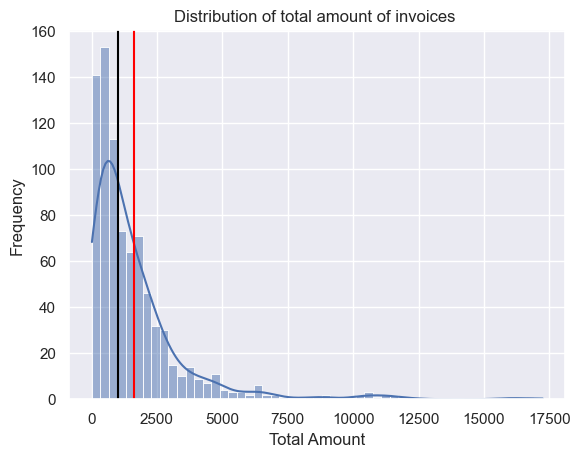

In [22]:
#data shape
sns.histplot(data=orders,x='totalamount',kde=True)
plt.title('Distribution of total amount of invoices ')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.axvline(x=orders.totalamount.mean(),color='red')
plt.axvline(x=orders.totalamount.median(),color='black')

In [23]:
Q1=orders.totalamount.quantile(.25)
Q3=orders.totalamount.quantile(.75)
IQR=Q3-Q1

lb=Q1 -(1.5*IQR)
ub=Q3 +(1.5*IQR)

print(f'Q1={Q1},Q3={Q3},lb={lb},ub={ub}')


Q1=480.0,Q3=2028.65,lb=-1842.9750000000004,ub=4351.625


In [24]:
exp.box(data_frame=orders,x='totalamount')

In [25]:
#geting outliers 
orders[orders.totalamount > ub].count()

customerid     56
firstname      56
lastname       56
city           56
country        56
orderid        56
ordernumber    56
orderdate      56
totalamount    56
dtype: int64

In [26]:
orders=orders[orders.totalamount < 15000]

In [45]:
exp.bar(data_frame=orders.city.value_counts(),title='Distibution of cities')

In [28]:
exp.bar(data_frame=orders.country.value_counts(),title='Distibution of ccountries')

In [29]:
exp.pie(data_frame=orders,names='country',title='Relative frequency of country sales')

Through the preliminary analysis, We see that london is the city with the largest share of purchasing our products with 46 invoives, And that USA and Germany are the most purchasing countries for our products with 121 invoices and 14.6% of our total sales.

#### Countries vs Total amount      
#### Cities vs Total amount 

In [30]:
orders.groupby('country',as_index=False)['totalamount'].sum().sort_values('totalamount',ascending=False)

,country,totalamount
19,USA,"247,245.08"
8,Germany,"227,390.63"
1,Austria,"139,496.63"
3,Brazil,"99,158.48"
7,France,"85,498.76"
20,Venezuela,"60,814.89"
18,UK,"60,616.51"
16,Sweden,"59,523.70"
9,Ireland,"57,317.39"
4,Canada,"55,334.10"


In [31]:
def plot(columnname,top10 = False):
    
    #proportion of total amount for each country = sum of total  amount for each country / total amount for all countries 
    
    prop = orders.groupby(columnname,as_index=False)['totalamount'].sum()
    prop['proportion']=(prop.totalamount/ prop.totalamount.sum()) *100
    prop=prop.sort_values('proportion',ascending=False)
    print('Describe of all total amount values',prop.totalamount.describe())
    if top10 == True:
        prop=prop.head(10)
        
    fig1= exp.bar(data_frame=prop,x=columnname,y='totalamount')
    fig2= exp.pie(data_frame=prop,names=columnname,values='totalamount')
    
    fig1.show()
    fig2.show()

In [32]:
plot('country')

Describe of all total amount values count        21.00
mean     62,146.51
std      67,460.19
min       3,531.95
25%      19,431.89
50%      35,134.98
75%      60,814.89
max     247,245.08
Name: totalamount, dtype: float64


The data highlights that a few countries (USA, Germany, Austria) dominate the total amount, while others contribute minimally. The USA leads with the highest total amount, followed by Germany and Austria. Brazil, France, and Venezuela contribute moderately, while countries like Norway and Poland show the lowest values. The percentage share of each country in the total. The USA holds the largest share at 18.9%, followed by Germany at 17.4%, and Austria at 10.7%. Smaller contributions are observed from countries such as Argentina, Norway, and Poland.

In [33]:
plot('city',top10=True)

Describe of all total amount values count        69.00
mean     18,914.15
std      22,692.99
min         357.00
25%       4,788.06
50%      11,830.10
75%      23,850.95
max     113,236.68
Name: totalamount, dtype: float64


Graz has the highest total amount, followed closely by Cunewalde and Boise. Other cities, like Cork and London, have moderate values. while the
Pie Chart which represents the percentage contribution of each city to the total. Graz accounts for 18.1%, followed by Cunewalde at 16%, and Boise at 15.9%. Smaller contributions come from cities like Rio de Janeiro, Brücke, and Montreal, which have percentages around 5-6%.
This data shows significant variation in total amounts across different cities, with a few cities contributing more prominently.

#### Order data vs Total amount

In [41]:
date_total =orders[['orderdate','totalamount']]
date_total = date_total.set_index('orderdate')


In [79]:
exp.line(data_frame=date_total,y='totalamount')

#### Order date vs Country 

In [80]:
date_country =orders[['orderdate','country']]
date_country =date_country.set_index('orderdate') 
date_country =date_country.country.resample(rule='1ME').nunique()
date_country.head()

orderdate
2012-07-31    11
2012-08-31    11
2012-09-30    11
2012-10-31    13
2012-11-30    11
Freq: ME, Name: country, dtype: int64

In [81]:
exp.line(data_frame=date_country,y='country')

There is a general upward trend from October 2012 to early 2014, with some fluctuations. The frequency peaked around April 2014. Overall, there’s a clear variation in N of countries over time, with the highest N reached in early 2014, followed by a significant drop.

#### Customer vs Total amount

In [82]:
cust_orders={
    'fullname': orders.firstname + ' ' + orders.lastname,
    'totalamount': orders.totalamount
}
cust_orders=pd.DataFrame(cust_orders)
cust_orders.head()

,fullname,totalamount
0,Paul Henriot,440.00
3,Karin Josephs,"1,863.40"
5,Mario Pontes,"1,813.00"
8,Mary Saveley,670.80
11,Pascale Cartrain,"3,730.00"


In [83]:
fig=exp.bar(cust_orders.groupby('fullname')['totalamount'].count().sort_values(ascending=False).head(10),text_auto=True,title='Number of orders by customers',labels={'fullname':'Full Name' ,'value':'Frequency' } )

#Customize aspects 
fig.update_traces(marker_color='rgb(158,202,225)',marker_line_color='rgb(8,48,107)' , marker_line_width=1.5,textposition='outside',opacity=.6)

Overall, there’s a clear variation in order frequency across the customers, with the top two customers (José Pavarotti and Roland Mendel) having significantly higher N of orders than the rest. with 30 orders for everyone of them.

In [84]:
fig=exp.bar(cust_orders.groupby('fullname')['totalamount'].sum().sort_values(ascending=False).head(10),text_auto=True,title='Total amount by customers',labels={'fullname':'Full Name' ,'value':'Frequency' } )

#Customize aspects 
fig.update_traces(marker_color='rgb(158,202,225)',marker_line_color='rgb(8,48,107)' , marker_line_width=1.5,textposition='outside',opacity=.6)

Roland Mendel leads with the highest amount, reaching approximately 113.2k, followed closely by Horst Kloss and Jose Pavarotti with amounts around 100.2k and 99.3k, respectively.The top three customers having significantly higher amounts than the rest.

In [37]:
orders.sample(14)

,customerid,firstname,lastname,city,country,orderid,ordernumber,orderdate,totalamount
1137,32.00,Howard,Snyder,Eugene,USA,434.00,"542,811.00",2013-09-25,"1,327.00"
1753,5.00,Christina,Berglund,Lule?,Sweden,677.00,"543,054.00",2014-03-04,"2,034.50"
1795,9.00,Laurence,Lebihan,Marseille,France,693.00,"543,070.00",2014-03-11,360.00
1817,10.00,Elizabeth,Lincoln,Tsawassen,Canada,702.00,"543,079.00",2014-03-13,"4,422.00"
1712,88.00,Paula,Parente,Resende,Brazil,658.00,"543,035.00",2014-02-24,360.00
1510,64.00,Sergio,Gutiérrez,Buenos Aires,Argentina,581.00,"542,958.00",2014-01-13,932.00
1278,9.00,Laurence,Lebihan,Marseille,France,485.00,"542,862.00",2013-11-06,360.00
1577,39.00,Philip,Cramer,Brandenburg,Germany,602.00,"542,979.00",2014-01-23,"1,052.14"
1112,26.00,Carine,Schmitt,Nantes,France,424.00,"542,801.00",2013-09-17,920.10
882,82.00,Helvetius,Nagy,Kirkland,USA,330.00,"542,707.00",2013-06-23,569.00


### We interested in knowing the number of countries and the grand total amount of them per month

In [50]:
multiVar=orders[['orderdate','country','totalamount']]
multiVar=multiVar.set_index('orderdate')
multiVar.head()

,country,totalamount
orderdate,,
2012-07-04,France,440.00
2012-07-05,Germany,"1,863.40"
2012-07-08,Brazil,"1,813.00"
2012-07-08,France,670.80
2012-07-09,Belgium,"3,730.00"


In [51]:
multiVar=multiVar.resample('1ME').agg({'country':'nunique','totalamount':'sum'})
multiVar.head()


,country,totalamount
orderdate,,
2012-07-31,11,"30,192.10"
2012-08-31,11,"26,609.40"
2012-09-30,11,"27,636.00"
2012-10-31,13,"41,203.60"
2012-11-30,11,"49,704.00"


In [55]:
figer=exp.bar(data_frame=multiVar,x=multiVar.index,y=round(multiVar.totalamount,0),color=multiVar.country,text_auto=True,title='Grand total amount of all countries per month',labels={'orderdate':'Order Date','y':'Total Amount'}) 
figer.update_traces(textposition='outside')
figer.update_layout(title_x=0.5)
figer.show()

 The data shows a fluctuating trend, with noticeable increases in total amounts during specific months. For instance, significant peaks are observed in January 2013,January 2014, and particularly in April 2014, where the total amount reaches its highest value. The color gradient indicates the number of countries contributing to the totals, with brighter colors representing higher numbers of countries.

### Grand total of each country per month

In [58]:
multiVar=orders[['orderdate','country','totalamount']]


In [59]:
multiVar.orderdate=multiVar.orderdate.dt.to_period('M')

C:\Users\TESTER\AppData\Local\Temp\ipykernel_7064\1551158760.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
multiVar=multiVar.groupby(['orderdate','country'],as_index=False)['totalamount'].sum().sort_values('totalamount',ascending=False)
multiVar.head()

,orderdate,country,totalamount
255,2014-01,USA,"27,594.45"
166,2013-07,USA,"26,022.30"
300,2014-04,Germany,"22,584.49"
249,2014-01,Germany,"22,135.55"
206,2013-10,Germany,"22,079.05"


In [61]:
multiVar.orderdate=multiVar.orderdate.astype('datetime64[ns]')

In [67]:
exp.scatter(data_frame=multiVar,x=multiVar.orderdate,y=multiVar.totalamount,color=multiVar.country,size=multiVar.totalamount,title='Total amount per country across the time')



Each bubble representing a specific country and the size of the bubble corresponding to the total amount. The chart reveals varying trends among countries, with some, such as the USA and Germany, consistently contributing larger amounts, evident by their prominently sized bubbles. Peaks in total amounts can be observed in specific time periods like July 2013 and January 2014.